# Genome data analysis in Python

### A brief tutorial on the use of *jupyter notebooks* and the python data analysis library *pandas* for genomic data analysis. 
Workshop on Population and Speciation Genomics, Český Krumlov, January 2018. <br>
By Hannes Svardal (<hs669@cam.ac.uk>)

This is a jupyter notebook running a Python 2 kernel. The Jupyter Notebook App (formerly IPython Notebook) is an application running inside the browser. Jupyter notebooks can run different kernels: Python 2/3, R, Julia, bash, ...

Further resources about jupyter notebooks can be found here: <br>
 - https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/ <br>
 - https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook

Jupyter notebooks can run locally or on a server. You access them in your browser. <br>

To start the jupyter server
 - Log into your amazon cloud instance: ```ssh wpsg@my-ip-here.compute-1.amazonaws.com``` (replace my-ip-here with your instance's address)
 - Navigate into the tutorial directory: ```cd ~/workshop_materials/03a_jupyter_notebooks/```
 - Start the notebook server: ```jupyter notebook --no-browser --port=7000 --ip=0.0.0.0```
 - In your local browser, navigate to the web address: http://my-ip-here.compute-1.amazonaws.com:7000
 - On the web page, type in the password *evomics2018*

Now you should have this notebook in front of you. 
 - At the top of the webpage, the notebook environment has a **header** and a **toolbar**, which can be used to change settings, formatting, and interrupt or restart the kernel that interprets the notebook cells.
 - The body of the notebook is built up of cells of two has two major types: markdown cells and code cells. You can set the type for each cell either using the toolbar or with keyboard commands. The right-most button in the toolbar shows all keyboard shortcuts.
 - **Markdown cells** (this cell and all above) contain text that can be formatted using html-like syntax <br> http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html <br>
 Double-klick into a markdown cell (like this one) to get into *edit mode*
 - **Code cells** contain computer code (in our case written in python 2). Code cells have an **intput field** in which you type code. Cells are evaluated by pressing *shift + return* with the cursor being in the cell. This produces an **output field** with the result of the evaluation that would be returned to std-out in a normal python (or R) session. Below are a few examples of input cells and the output. Note that by default only the result of the last operation will be output, and that only if it is not asigned to a variable, but all lines will be evaluated.

Here are some very basic operations. Evaluate the cells below and check the results.

In [6]:
# This is a code cell.
# Evaluate it by moving the cursor in the cell an pressing <shift + return>.
1+1

2

In [7]:
# This is anoter code cell.
# There is no output because the last operation is assigned to a variable.
# However, the operations are performed and c is now assigned a value.
# Evaluate this cell!
a = 5
b = 3
c = a * b

In [8]:
# The variables should now be assigned. Evaluate.
print 'a is', a
print 'b is', b
print 'c is a*b, which is', c

a is 5
b is 3
c is a*b, which is 15


Try to create more cells using either the "plus" button in the toolbar above or the keyboard combination (Ctrl + M) + B (First Ctrl + M together, then B). Try to define variables and do calculations in these cells.

## Python basics

This is very basic python stuff. People who are farmiliar with python can skip this part.

### loading modules

In [9]:
# Load some packages that we will need below
# by evaluating this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Refer to objects (e.g. functions) from these packages by with module.object
print np.sqrt(10)
print np.pi

3.16227766017
3.14159265359


### lists, list comprehension, and numpy arrays

Lists are a very basic data type in python. Elements can be accessed by index. **Attention:** Different from R, Python data structures are generally zero indexed. The first element has index 0.

In [11]:
list0 = [1, 2, 3, 4]
print list0
print list0[1]

[1, 2, 3, 4]
2


In [12]:
# the last element
print list0[-1]
# elements 2 to 3
print list0[1:3]

4
[2, 3]


*List comprehensions* are a very useful feature in Python. It is an in-line way of iteratin through a list.

In [13]:
# This is the syntax of a so-called list comprehension. 
# A very useful feature to create a new list by iterating through other list(s).
squares = [i*i for i in list0]
print squares

# Doing this in conventional syntax would be more verbose:
squares = []
for i in list0:
    squares.append(i*i)
print squares

[1, 4, 9, 16]
[1, 4, 9, 16]


A numpy array is a vector-like object of arbitrary dimensions. Operations on numpy arrays are generally faster than iterating through lists.

In [14]:
array0 = np.array(list0)
print array0

[1 2 3 4]


In [15]:
# Operations on an array are usually element-wise.
# Square the array elements.
print array0**2

[ 1  4  9 16]


In [16]:
# Instantiate array 0 .. 19
x = np.arange(20)
print x

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [17]:
# 2D array
array2d = np.array(
                [[1,2,3],
                [4,5,6]]
                )
print array2d
print array2d*2
print 'number of rows and columns:', array2d.shape

[[1 2 3]
 [4 5 6]]
[[ 2  4  6]
 [ 8 10 12]]
number of rows and columns: (2, 3)


### anonymous (lambda) function

A lambda function is a function that is not bound to a name at creation time.

In [18]:
# This is a regular function
def square(x):
    """
    This is a regular function
    definition. Defined in evomics2018.
    
    This function takes a number (int or float)
    and returns the square of it.
    
    """
    return x*x

print 'This is a regular function:', square
print square(5)

This is a regular function: <function square at 0x7f451adc6500>
25


In [19]:
# A lambda function is defined in-line; here it is bound to a name, 
# but that is not necessary
square2 = lambda x: x*x
print 'This is an anonymous function:', square2
print square2(5)

This is an anonymous function: <function <lambda> at 0x7f451adc60c8>
25


The advantage of an anonymous function is that you can define it on the go.

In [20]:
#For this you must pre-define the function 'square'
map(square, list0)

[1, 4, 9, 16]

In [21]:
#Here the same but defining the function on the go.
#This is very useful when we apply functions to data frames below
map(lambda x:x*x, list0)

[1, 4, 9, 16]

## Ipython

Ipython is an interactive interface for python. Jupyter notebooks that run a python kernel use Ipython. It basically is a wrapper around python that adds some useful features and commands. A tutorial can be found here: https://ipython.org/ipython-doc/3/interactive/tutorial.html

The four most helpful commands (type in a code cell and evaluate)

|command|	description|
|------|------|
|?|	Introduction and overview of IPython’s features.|
|%quickref|	Quick reference.|
|help|	Python’s own help system.|
|object?|	Details about ‘object’, use ‘object??’ for extra details.|

In [22]:
# Evaluate this to get the documentation of the function **map** as a popup below. 
map?

In [23]:
# Get the docstring of your own function defined above.
square?

### Ipython magic

IPython *magic commands*, are tools that simplify various tasks. They are prefixed by the % character. Magic commands come in two flavors: line magics, which are denoted by a single % prefix and operate on a single line of input, and cell magics, which are denoted by a double %% prefix and operate on multiple lines of input. 

#### Examples

In [24]:
# Time a command with %timeit
%timeit 1+1

100000000 loops, best of 3: 16.6 ns per loop


In [25]:
%%timeit
#Time a cell operation
x = range(10000)
max(x)

1000 loops, best of 3: 238 µs per loop


In [26]:
# This is a very useful magic that allows us to create plots inside the jupyter notebook
# EVALUATE THIS CELL!!!
%matplotlib inline

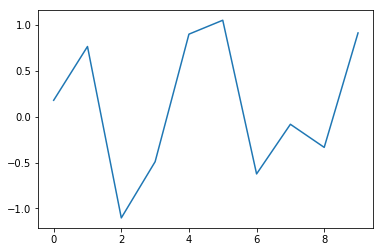

In [27]:
# Make a basic plot
plt.plot(np.random.randn(10))

### running shell commands

You can use ipython magic to run a command using the system shell and return the output. Simply prepend a command with "!" or start a cell with %%bash for a multi line command.

In [28]:
!ls

201801_jupyter_pandas_tutorial.ipynb  cichlid_data_outgroup.vcf.gz.tbi
cichlid_data_outgroup.vcf.gz	      cichlid_sample_metadata.csv


In [29]:
files = !ls
print files

['201801_jupyter_pandas_tutorial.ipynb', 'cichlid_data_outgroup.vcf.gz', 'cichlid_data_outgroup.vcf.gz.tbi', 'cichlid_sample_metadata.csv']


In [30]:
!msmc2

This is version 2.0.2. Usage: msmc2 [options] <datafiles>
  Options:
    -i, --maxIterations=<size_t> :      number of EM-iterations [default=20]
    -o, --outFilePrefix=<string> :      file prefix to use for all output files
    -m, --theta=<double> :              fix the scaled mutation rate, by default determined by the number of 
                                        segregating sites. This option determines the exact placement of the time
                                        segment boundaries. For a cross-population analysis, you need three independent 
                                        msmc runs, and you should use this option to ensure the same time boundaries in 
                                        each run, see documentation.
    -r, --rhoOverMu=<double> :          ratio of recombination over mutation rate (default: 0.25)
    -t, --nrThreads=<size_t> :          nr of threads to use (defaults to nr of CPUs)
    -p, --timeSegmentPattern=<string> : pattern of fixe

In [31]:
%%bash
cd ~
ls
echo ----------------
echo $PATH

bin
Desktop
dlang
Downloads
miniconda3
R
software
workshop_materials
----------------
/usr/local/bin:/home/wpsg/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/home/wpsg/miniconda3/bin:/home/wpsg/software/hmmer-3.1b2-linux-intel-x86_64/binaries/:/home/wpsg/software/partitionfinder-2.1.1/:/home/wpsg/software/.source/jmodeltest-2.1.10:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/home/wpsg/software/EIG-6.1.3/bin:/home/wpsg/software/plink:/home/wpsg/software/SLiM/bin:/home/wpsg/software/msms/bin:/home/wpsg/software/WFABC_v1.1/binaries/Linux:/home/wpsg/software/beast/bin:/home/wpsg/software/.source/pcangsd:/home/wpsg/software/msmc2/build/release:/home/wpsg/software/msmc-tools:/home/wps

## Pandas

https://pandas.pydata.org/ *pandas* is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

List of tutorials <br>
 - https://pandas.pydata.org/pandas-docs/stable/tutorials.html <br>

10 minutes quick start guide
 - https://pandas.pydata.org/pandas-docs/stable/10min.html

Installation (just like other python modules) <br>
```pip install pandas```

In [32]:
import pandas as pd

The two most important data structures in pandas are **Series** and **DataFrames**.

### pandas Series

A Series is a 1D-array-like object where each element has an index.

In [33]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In this case the index of s are integers 0,1,... but it could be strings, floats, ...

In [34]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [35]:
# for operations like addtions, elements are matched by index 
s + s

0     2.0
1     6.0
2    10.0
3     NaN
4    12.0
5    16.0
dtype: float64

In [36]:
# elements are matched by index, even if they arein a different order)
s1 = pd.Series([1, 3, 5, np.nan, 6, 8],index=['F','E','D','C','B','A'])
s2 = pd.Series([1, 3, 5, np.nan, 6, 8], 
             index=['A','B','C','D','E','F'])
print s1
print '-------------'
print s2

F    1.0
E    3.0
D    5.0
C    NaN
B    6.0
A    8.0
dtype: float64
-------------
A    1.0
B    3.0
C    5.0
D    NaN
E    6.0
F    8.0
dtype: float64


In [37]:
# what do you expect the result of this to be?
s1 + s2

A    9.0
B    9.0
C    NaN
D    NaN
E    9.0
F    9.0
dtype: float64

Do you understand the result above?

In [38]:
# Access an element using the index
s.loc[2]

5.0

In [39]:
# Access an element using the psition
s.iloc[2]

5.0

In the above case, the two are trivially the same, but for s1 and s2 it is very different. Try both ways of accessing elements on s1 and s2.

### pandas DataFrame

Pandas data frames are similar to R data frames. A DataFrame is a 2D-array-like object where each element has a row index and a column index. 
The row index is called 'index', the column index is called 'columns'.

In the following, create a simple data frame and inspect its elements. Try to modify the code in this section.

In [40]:
df = pd.DataFrame([[1,2,3],
                   [4,5,6]],
                  index=[100,200],
                  columns=['A','B','C'])

In [41]:
df

,A,B,C
100,1,2,3
200,4,5,6


In [42]:
df.index

Int64Index([100, 200], dtype='int64')

In [43]:
df.columns

Index([u'A', u'B', u'C'], dtype='object')

In [44]:
df.index.values

array([100, 200])

In [45]:
# access by position
df.iloc[1, 2]

6

In [46]:
# access an element by index
df.loc[200, 'C']

6

In [47]:
#access a row
df.loc[200,:]

A    4
B    5
C    6
Name: 200, dtype: int64

In [48]:
#access a column
df.loc[:,'C']

100    3
200    6
Name: C, dtype: int64

In [49]:
#logical indexing
df.loc[df['A']>2,]

,A,B,C
200,4,5,6


In [50]:
df.loc[:, df.loc[200]>4]

,B,C
100,2,3
200,5,6


In [51]:
df + df

,A,B,C
100,2,4,6
200,8,10,12


In [52]:
# mean of rows
print df.mean()

A    2.5
B    3.5
C    4.5
dtype: float64


In [53]:
# mean of columns
print df.mean(axis=1)

100    2.0
200    5.0
dtype: float64


In [54]:
# If a function on a data frame returns a 1D object, the results is a pd.Series
print type(df.loc[100,:])

<class 'pandas.core.series.Series'>


#### Apply operations 

Data Frames have many handy methods built in. For applying functions, grouping elements, plotting. We will see several of them below. Here The simples apply opperations.

In [55]:
df.apply(square)

,A,B,C
100,1,4,9
200,16,25,36


In [56]:
# apply along rows (column-wise)
df.apply(np.sum, axis=0)

A    5
B    7
C    9
dtype: int64

In [57]:
# apply along columns (row-wise)
df.apply(np.sum, axis=1)

100     6
200    15
dtype: int64

For the above there exists a shortcut. You can directly use df.sum(axis=...)

In [58]:
# apply element-wise
df.applymap(lambda i:'ABCDEFGHIJKLMN'[i])

,A,B,C
100,B,C,D
200,E,F,G


What does the above code cell do? Play around with it to understand what is happening.

Tipp: It helps to look at each of the part in turn.

In [59]:
'ABCDEFGHIJKLMN'[2]

'C'

In [60]:
df.applymap?

## Working with SNP calls

Here it gets interesting. How can we use pandas to analyse genome data. Note that some of the below is a bit simplified and you would do things slightly differently in a production pipeline.

The combination of jupyter notebooks and pandas is great for quick exploration of data. But using ipython parallel one can also handle demaning analyses.

We will be using a cichlid fish VCF file with bi-allelic SNP calls.

In [61]:
#check which files are in the folder
!ls

201801_jupyter_pandas_tutorial.ipynb  cichlid_data_outgroup.vcf.gz.tbi
cichlid_data_outgroup.vcf.gz	      cichlid_sample_metadata.csv


In [62]:
vcf_fn = 'cichlid_data_outgroup.vcf.gz'

In [63]:
# Use bash magic to take a look at the file contents

In [64]:
%%bash
gzip -dc "cichlid_data_outgroup.vcf.gz" | head -n 18

##fileformat=VCFv4.1
##FILTER=<ID=PASS,Description="All filters passed">
##fileDate=13092017_10h46m48s
##source=SHAPEIT2.v837
##log_file=shapeit_13092017_10h46m48s_a225583f-ce12-4530-881d-63b6e20bb1ee.log
##FORMAT=<ID=GT,Number=1,Type=String,Description="Phased Genotype">
##contig=<ID=Contig237>
##contig=<ID=Contig262>
##contig=<ID=Contig263>
##bcftools_concatVersion=1.3.1+htslib-1.3.1
##bcftools_concatCommand=concat -O z -o /lustre/scratch113/projects/cichlid/analyses/20170704_variant_calling_malombe/_data/cichlid_data_outgroup.vcf.gz /lustre/scratch113/projects/cichlid/analyses/20170704_variant_calling_malombe/_data/cichlid_data_Contig237_phased_outgroup.vcf.gz /lustre/scratch113/projects/cichlid/analyses/20170704_variant_calling_malombe/_data/cichlid_data_Contig262_phased_outgroup.vcf.gz /lustre/scratch113/projects/cichlid/analyses/20170704_variant_calling_malombe/_data/cichlid_data_Contig263_phased_outgroup.vcf.gz
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	VirSWA1	VirSWA2	VirSWA


gzip: stdout: Broken pipe


Parse in the header line of the file

In [65]:
## parse the header line starting with "#CHROM"
import gzip
with gzip.open(vcf_fn) as f:
    for line in f:
        if line[:6] == '#CHROM':
            vcf_header = line.strip().split('\t')
            vcf_header[0] = vcf_header[0][1:]
            break

In [66]:
#The vcf
print vcf_header[:20]

['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'VirSWA1', 'VirSWA2', 'VirSWA3', 'VirSWA4', 'VirSWA5', 'VirSWA6', 'VirSWA7', 'VirSWA8', 'VirSWA9', 'VirSWA10', 'VirSWA11']


In [67]:
# Read a tsv, csv, into a data frame
pd.read_csv?

In [68]:
# Here we read in the vcf file, which basically is tab-separated value file.
gen_df = pd.read_csv(vcf_fn, 
                     sep='\t',
                     comment='#',
                     header=None,
                     names=vcf_header,
                     index_col=['CHROM','POS'])

In [69]:
gen_df.head()

ID REF ALT QUAL FILTER INFO FORMAT VirSWA1 VirSWA2 VirSWA3  \
CHROM     POS                                                               
Contig237 3190  .   G   A    .   PASS    .     GT     0|0     0|1     0|0   
          3203  .   T   C    .   PASS    .     GT     1|1     1|1     1|1   
          3230  .   A   G    .   PASS    .     GT     0|0     0|0     0|0   
          3310  .   G   T    .   PASS    .     GT     0|0     0|0     0|0   
          3311  .   G   T    .   PASS    .     GT     0|1     0|0     0|0   

                 ...   VirSEA16 VirSEA17 VirSEA18 VirSEA19 VirSEA20 VirSEA21  \
CHROM     POS    ...                                                           
Contig237 3190   ...        0|0      0|0      0|0      0|0      0|0      0|0   
          3203   ...        1|1      1|1      1|1      1|1      1|1      1|1   
          3230   ...        0|0      0|0      0|0      0|0      0|0      0|0   
          3310   ...        0|0      0|0      0|0      0|0      0|1      0|1   
          3311   ...        0|0      0|0      0|0      0|0      0|0      0|0   

               VirSEA22 VirSEA23 VirSEA24 OreSqu1  
CHROM     POS                                      
Contig237 3190      0|0      0|0      0|0     0|0  
          3203      1|1      1|1      1|1     1|1  
          3230      0|0      0|0      0|0     0|0  
          3310      0|0      0|0      0|0     0|0  
          3311      0|0      0|0      0|0     0|0  

[5 rows x 83 columns]

In [70]:
# Convert the GT=string into data frames with integer for first and second haplotype
first_haplotype = gen_df.iloc[:, 9:].applymap(lambda s: int(s.split('|')[0]))
second_haplotype = gen_df.iloc[:, 9:].applymap(lambda s: int(s.split('|')[1]))

In [71]:
first_haplotype.head()

VirSWA3  VirSWA4  VirSWA5  VirSWA6  VirSWA7  VirSWA8  VirSWA9  \
CHROM     POS                                                                   
Contig237 3190        0        0        0        0        0        0        0   
          3203        1        1        1        1        1        1        1   
          3230        0        0        0        0        0        0        0   
          3310        0        0        0        0        0        0        0   
          3311        0        0        0        0        0        0        0   

                VirSWA10  VirSWA11  VirSWA12   ...     VirSEA16  VirSEA17  \
CHROM     POS                                  ...                          
Contig237 3190         0         0         0   ...            0         0   
          3203         1         1         1   ...            1         1   
          3230         0         0         0   ...            0         0   
          3310         0         0         0   ...            0         0   
          3311         0         0         0   ...            0         0   

                VirSEA18  VirSEA19  VirSEA20  VirSEA21  VirSEA22  VirSEA23  \
CHROM     POS                                                                
Contig237 3190         0         0         0         0         0         0   
          3203         1         1         1         1         1         1   
          3230         0         0         0         0         0         0   
          3310         0         0         0         0         0         0   
          3311         0         0         0         0         0         0   

                VirSEA24  OreSqu1  
CHROM     POS                      
Contig237 3190         0        0  
          3203         1        1  
          3230         0        0  
          3310         0        0  
          3311         0        0  

[5 rows x 74 columns]

In [72]:
# Create a second level in the column index that specifies the haplotype
first_haplotype.columns = pd.MultiIndex.from_product([first_haplotype.columns, [0]])
second_haplotype.columns = pd.MultiIndex.from_product([second_haplotype.columns, [1]])

In [73]:
first_haplotype.head()

VirSWA3 VirSWA4 VirSWA5 VirSWA6 VirSWA7 VirSWA8 VirSWA9  \
                     0       0       0       0       0       0       0   
CHROM     POS                                                            
Contig237 3190       0       0       0       0       0       0       0   
          3203       1       1       1       1       1       1       1   
          3230       0       0       0       0       0       0       0   
          3310       0       0       0       0       0       0       0   
          3311       0       0       0       0       0       0       0   

               VirSWA10 VirSWA11 VirSWA12   ...   VirSEA16 VirSEA17 VirSEA18  \
                      0        0        0   ...          0        0        0   
CHROM     POS                               ...                                
Contig237 3190        0        0        0   ...          0        0        0   
          3203        1        1        1   ...          1        1        1   
          3230        0        0        0   ...          0        0        0   
          3310        0        0        0   ...          0        0        0   
          3311        0        0        0   ...          0        0        0   

               VirSEA19 VirSEA20 VirSEA21 VirSEA22 VirSEA23 VirSEA24 OreSqu1  
                      0        0        0        0        0        0       0  
CHROM     POS                                                                 
Contig237 3190        0        0        0        0        0        0       0  
          3203        1        1        1        1        1        1       1  
          3230        0        0        0        0        0        0       0  
          3310        0        0        0        0        0        0       0  
          3311        0        0        0        0        0        0       0  

[5 rows x 74 columns]

In [74]:
# Creat a haplotype dataframe with all the data
hap_df = pd.concat([first_haplotype, second_haplotype], axis=1).sort_index(axis=1)

In [75]:
hap_df.head()

OreSqu1    VirMAL1    VirMAL10    VirMAL11    VirMAL12    ...  \
                     0  1       0  1        0  1        0  1        0  1 ...   
CHROM     POS                                                            ...   
Contig237 3190       0  0       0  0        0  0        0  0        0  0 ...   
          3203       1  1       1  1        0  1        1  1        0  1 ...   
          3230       0  0       0  0        1  0        0  0        1  0 ...   
          3310       0  0       0  0        0  0        0  0        0  0 ...   
          3311       0  0       0  0        0  0        0  0        0  0 ...   

               VirSWA5    VirSWA6    VirSWA7    VirSWA8    VirSWA9     
                     0  1       0  1       0  1       0  1       0  1  
CHROM     POS                                                          
Contig237 3190       0  0       0  0       0  0       0  0       0  0  
          3203       1  1       1  1       1  1       1  1       1  1  
          3230       0  0       0  0       0  0       0  0       0  0  
          3310       0  0       0  0       0  0       0  0       0  0  
          3311       0  0       0  0       0  0       0  0       0  0  

[5 rows x 148 columns]

In [76]:
import subprocess

def read_hap_df(vcf_fn, chrom=None, start=None, end=None, samples=None, **kwa):
    """
    A slightly more advanced vcf parser.
    Reads in haplotypes from a vcf file.
    Basically does the same as done in the
    cells above, but allows the used to 
    specify the range of the genome that
    should be read in. Also allows to specify
    which samples should be used.
    
    Parameters:
    vcf_fn : file path of the VCF to be read
    chrom : specify which chromosome (or scaffold)
            to read from the file 
            (only works on bgzipped, tabix-indexed files)
            default ... read whole file
    start: specify the start nucleotide position
            (only works if chrom given on bgzipped, 
            tabix-indexed files); default=1
    end: specify the ebd nucleotide position
            (only works if chrom given on bgzipped, 
            tabix-indexed files); default=chrom_end
    samples: list of sample names to read;
              default ... all samples
              
    returns:
    Pandas dataframe of index (chrom, pos) 
    and columns (sample, haplotype). Values
    are 0 for first and 1 for second allele.
    
    """
    # parse header
    with gzip.open(vcf_fn) as f:
        for line in f:
            if line[:6] == '#CHROM':
                vcf_header = line.strip().split('\t')
                vcf_header[0] = vcf_header[0][1:]
                break
    
    # determine genomic region to read in
    if chrom is not None:
        assert vcf_fn[-3:] == ".gz", "Only supply chrom if vcf is bgzipped and tabix indexed" 
        region = chrom
        if end is not None and start is None:
            start = 0
        if start is not None:
            region += ':' + str(start)
            if end is not None:
                region += '-' + str(end)
    else:
        region = None
    
    # If no specific samples given, use all samples in the VCF
    if samples is None:
        samples = vcf_header[9:]
    
    # Either use regional input or input whole VCF
    if region is None:
        stdin = vcf_fn
    else:
        tabix_stream = subprocess.Popen(['tabix', vcf_fn, region],
                                     stdout=subprocess.PIPE,
                                     stderr=subprocess.PIPE)
        stdin = tabix_stream.stdout
    
    
    gen_df = pd.read_csv(stdin, 
                         sep='\t',
                         comment='#',
                         names=vcf_header,
                         usecols=['CHROM','POS']+samples,
                         index_col=['CHROM','POS'], **kwa)
    first_haplotype = gen_df.applymap(lambda s: int(s.split('|')[0]))
    second_haplotype = gen_df.applymap(lambda s: int(s.split('|')[1]))
    
    first_haplotype.columns = pd.MultiIndex.from_product([first_haplotype.columns, [0]])
    second_haplotype.columns = pd.MultiIndex.from_product([second_haplotype.columns, [1]])
    
    hap_df = pd.concat([first_haplotype, second_haplotype], axis=1).sort_index(axis=1)
     
    return hap_df

In [77]:
small_hap_df = read_hap_df(vcf_fn, 
                     chrom='Contig237',
                     start=3000,
                     end=5000,
                     samples=['VirSWA1', 'VirSWA2', 'VirSWA3', 
                              'VirSWA4', 'VirSWA5', 'VirSWA6'])

In [78]:
small_hap_df

VirSWA1    VirSWA2    VirSWA3    VirSWA4    VirSWA5    VirSWA6  \
                     0  1       0  1       0  1       0  1       0  1       0   
CHROM     POS                                                                   
Contig237 3190       0  0       0  1       0  0       0  0       0  0       0   
          3203       1  1       1  1       1  1       1  1       1  1       1   
          3230       0  0       0  0       0  0       0  0       0  0       0   
          3310       0  0       0  0       0  0       0  0       0  0       0   
          3311       0  1       0  0       0  0       0  0       0  0       0   
          3313       0  0       0  0       0  0       0  0       0  0       0   
          3314       0  0       0  0       0  0       0  0       0  0       0   
          3321       1  1       1  1       1  1       1  1       1  1       1   
          3340       0  0       0  0       0  0       0  0       0  0       0   
          3352       0  0       0  0       0  0       0  0       0  0       0   
          3353       0  0       0  0       0  0       0  0       0  0       0   
          3366       0  0       0  0       0  0       0  0       0  0       0   
          3376       0  0       0  0       0  0       0  0       0  0       0   
          3380       0  0       0  0       0  0       0  0       0  0       0   
          3424       1  0       0  0       0  0       0  1       0  0       0   
          3427       0  0       0  1       0  0       0  0       0  0       0   
          3429       0  0       0  1       0  0       0  0       0  0       0   
          3430       0  0       0  1       0  0       0  0       0  0       0   
          3465       0  0       0  1       0  0       0  0       0  0       0   
          3478       0  0       0  1       0  0       0  0       0  0       0   
          3489       0  0       0  1       0  0       0  0       0  0       0   
          3496       0  0       0  0       0  0       0  0       0  0       0   
          3527       0  0       0  0       0  0       0  0       0  0       0   
          3531       0  0       0  1       0  0       0  0       0  0       0   
          3547       0  0       0  0       0  0       0  0       0  0       0   
          3551       0  0       0  1       0  0       0  0       0  0       0   
          3603       0  0       0  1       0  0       0  0       0  1       0   
          3616       0  0       0  1       0  0       0  0       0  0       0   
          3621       0  0       0  0       0  0       0  0       0  0       0   
          3627       0  0       0  0       0  0       0  0       0  0       0   
          3714       0  0       0  0       0  0       0  0       0  0       0   
          3799       0  0       0  0       0  0       0  0       0  0       0   
          3836       0  0       0  0       0  0       0  0       0  0       0   
          3890       0  0       0  0       0  0       0  0       0  0       0   
          3892       0  0       0  0       0  0       0  0       0  0       0   
          3908       0  0       0  0       0  0       0  0       0  0       0   
          3921       0  0       0  0       0  0       0  0       0  0       0   
          3963       0  0       0  0       0  0       0  0       0  0       0   
          3999       0  0       0  0       0  0       0  0       0  0       0   

                   
                1  
CHROM     POS      
Contig237 3190  0  
          3203  1  
          3230  0  
          3310  0  
          3311  0  
          3313  0  
          3314  0  
          3321  1  
          3340  0  
          3352  0  
          3353  1  
          3366  0  
          3376  0  
          3380  0  
          3424  0  
          3427  0  
          3429  0  
          3430  0  
          3465  0  
          3478  0  
          3489  0  
          3496  0  
          3527  0  
          3531  0  
          3547  0  
          3551  0  
          3603  0  
          36

### indexing

In [79]:
# access a cell by index
# gt_df.loc['row index', 'column index']
print 'Get the second haplotye of individual',
print 'VirSWA6 for position 3203 on Contig237:', 
print hap_df.loc[('Contig237', 3203), ('VirSWA6', 1)]

Get the second haplotye of individual VirSWA6 for position 3203 on Contig237: 1


In [80]:
hap_df.loc['Contig237'].loc[ 3000:3400, 'VirSWA6']

,0,1
POS,,
3190,0,0
3203,1,1
3230,0,0
3310,0,0
3311,0,0
3313,0,0
3314,0,0
3321,1,1
3340,0,0


### investigate haplotype data frame

In [81]:
# get the number of SNPs and number of samples
hap_df.shape

(111215, 148)

In [82]:
# get the name of sequenced in this data frame
hap_df.index.droplevel(1).unique()

Index([u'Contig237', u'Contig262', u'Contig263'], dtype='object', name=u'CHROM')

### load sample metadata

In [83]:
meta_df = pd.read_csv('cichlid_sample_metadata.csv', index_col=0)

In [84]:
meta_df.head()

,genus,species,place,fishing_pressure
id,,,,
VirSWA3,Copadichromis,virginalis,South West Arm,1.0
VirSWA4,Copadichromis,virginalis,South West Arm,1.0
VirSWA5,Copadichromis,virginalis,South West Arm,1.0
VirSWA6,Copadichromis,virginalis,South West Arm,1.0
VirSWA7,Copadichromis,virginalis,South West Arm,1.0


#### Group a data frame using groupby

Groupby groups a data frame into sub data frames. You can group on values in a specific column (or row) or by applying a function or dictionary to column or row indices. This is very handy.

In [85]:
# group individuals by sampling location
place_groups = meta_df.groupby('place')

In [86]:
# iterate through groups
for group_name, group_df in place_groups:
    print group_name
    print group_df
    print '-----------------------------------------'

Malembo
               genus       species    place  fishing_pressure
id                                                           
OreSqu1  Oreochromis  squamipinnis  Malembo               NaN
-----------------------------------------
Malombe
                  genus     species    place  fishing_pressure
id                                                            
VirMAL1   Copadichromis  virginalis  Malombe               4.0
VirMAL2   Copadichromis  virginalis  Malombe               4.0
VirMAL3   Copadichromis  virginalis  Malombe               4.0
VirMAL4   Copadichromis  virginalis  Malombe               4.0
VirMAL5   Copadichromis  virginalis  Malombe               4.0
VirMAL6   Copadichromis  virginalis  Malombe               4.0
VirMAL7   Copadichromis  virginalis  Malombe               4.0
VirMAL8   Copadichromis  virginalis  Malombe               4.0
VirMAL9   Copadichromis  virginalis  Malombe               4.0
VirMAL10  Copadichromis  virginalis  Malombe               4.0


You can apply functions to the groups. These are applied to each group data frame. Pandas will try to give a series or data frame as result where the index contains the group names.

In [87]:
place_groups.apply(len)

place
Malembo            1
Malombe           24
South East Arm    24
South West Arm    25
dtype: int64

In [88]:
# here individuals are grouped by the columns genus and species
meta_df.groupby(['genus', 'species']).apply(len)

genus          species     
Copadichromis  virginalis      73
Oreochromis    squamipinnis     1
dtype: int64

In [89]:
# This is a Series with the same index as meta_df.
# The values are True/False depending on whether the species name is virginalis.
is_virginalis = (meta_df['species']=='virginalis')

What length do you expect is_virginalis to be? How many True and False entries?

The above can be used for logical indexing.

In [90]:
# Logical indexing. Select viriginalis samples only.
meta_df[is_virginalis].groupby('place').apply(len)

place
Malombe           24
South East Arm    24
South West Arm    25
dtype: int64

### apply operations

Apply functions to our haplotype data frame.

In [91]:
allele_frequency = hap_df.mean(axis=1)

In [92]:
allele_frequency.head()

CHROM      POS 
Contig237  3190    0.006757
           3203    0.952703
           3230    0.040541
           3310    0.013514
           3311    0.006757
dtype: float64

Plot the site frequency spectrum.

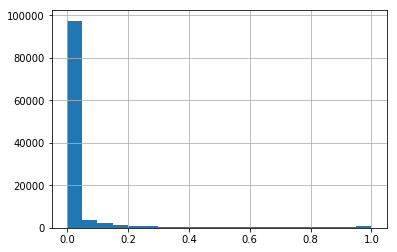

In [93]:
allele_frequency.hist(bins=20)

What is on the x and y axis? Does this spectrum look neutral to you?

#### restrict to samples of species Copadichromis virginalis

In [94]:
virginalis_samples = meta_df[meta_df['species']=='virginalis'].index.values

In [95]:
# only virginalis samples
hap_df_vir = hap_df.loc[:, list(virginalis_samples)] 
# the list conversion above is not needed in newer pandas versions

In [96]:
af_virginalis = hap_df_vir.mean(axis=1)

In [97]:
af_virginalis_variable = af_virginalis[(af_virginalis>0)&(af_virginalis<1)]

What does the above line of code do?

In [98]:
# restrict haplotype data frame to alleles variable in virginalis
hap_df_vir = hap_df_vir.loc[af_virginalis_variable.index, :]
# or equivalently 
#hap_df_vir = hap_df_vir[(af_virginalis>0)&(af_virginalis<1)]

Check how the number of SNPs was reduced by removing non-variable sites

In [99]:
print af_virginalis.shape
print af_virginalis_variable.shape

(111215,)
(54098,)


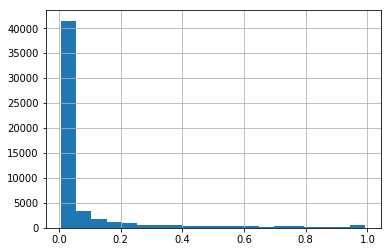

In [100]:
af_virginalis_variable.hist(bins=20)

#### remove low frequency variants

In [101]:
allele_count = hap_df.sum(axis=1)

In [102]:
# This is the number of non-missing entries per row.
# our data has no missing values, so it is just the row length
n_alleles = hap_df.notnull().sum(axis=1)

In [103]:
min_allele_count = 4
hap_min_ac = hap_df[(allele_count >= min_allele_count) & (allele_count <= n_alleles - min_allele_count)]

In [104]:
print hap_df.shape
print hap_min_ac.shape

(111215, 148)
(19867, 148)


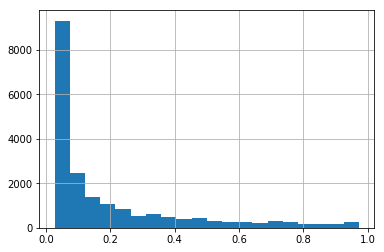

In [105]:
(hap_min_ac.mean(axis=1)).hist(bins=20)

### grouping by sample

In [106]:
# grouping can be done by a dictionary that is applied to index or columns
sample_groups = {'VirMAL1':'Malombe',
                 'VirMAL2':'Malombe',
                 'VirMAL3':'Malombe',
                 'VirSWA1':'South West Arm',
                 'VirSWA2':'South West Arm',
                 'VirSWA3':'South West Arm'}

In [107]:
sample_groups0 = hap_df_vir.groupby(sample_groups, axis=1, level=0)

In [108]:
sample_groups0.mean()

Malombe  South West Arm
CHROM     POS                             
Contig237 3190    0.000000             0.0
          3203    1.000000             1.0
          3230    0.000000             0.0
          3310    0.000000             0.0
          3311    0.000000             0.0
          3313    0.166667             0.0
          3314    0.000000             0.0
          3321    1.000000             1.0
          3340    0.000000             0.0
          3352    0.000000             0.0
          3353    0.000000             0.0
          3366    0.000000             0.0
          3376    0.166667             0.0
          3380    0.166667             0.0
          3424    0.166667             0.0
          3427    0.000000             0.0
          3429    0.000000             0.0
          3430    0.000000             0.0
          3465    0.000000             0.0
          3478    0.000000             0.0
          3489    0.000000             0.0
          3496    0.166667             0.0
          3527    0.000000             0.0
          3531    0.000000             0.0
          3547    0.000000             0.0
          3551    0.000000             0.0
          3603    0.166667             0.0
          3616    0.000000             0.0
          3621    0.000000             0.0
          3627    0.000000             0.0
...                    ...             ...
Contig263 598459  0.000000             0.0
          598473  1.000000             1.0
          598517  0.500000             0.5
          598524  0.833333             1.0
          598527  0.000000             0.0
          598550  0.000000             0.0
          598555  0.500000             0.5
          598578  0.000000             0.0
          598619  0.000000             0.0
          598623  0.333333             0.5
          598629  0.500000             0.5
          598630  0.500000             0.5
          598636  0.333333             0.5
          598750  0.500000             0.5
          598792  0.000000             0.0
          598903  0.333333             0.5
          598924  0.000000             0.0
          599020  0.333333             1.0
          599039  0.000000             0.0
          599258  0.000000             0.0
          599260  0.000000             0.0
          599286  0.333333             0.0
          605625  0.000000             0.0
          605656  0.000000             0.0
          605658  0.166667             0.0
          605668  0.000000             0.0
          605677  0.166667             0.5
          605679  0.000000             0.0
          605929  0.166667             0.0
          605938  0.000000             0.0

[54098 rows x 2 columns]

In [109]:
# group using a function
def get_location(sample_id):
    return meta_df.loc[sample_id, 'place']

location_groups = hap_df_vir.groupby(get_location, axis=1, level=0)


In [110]:
# equivalent to above but using a lambda function
location_groups = hap_df_vir.groupby(lambda id: meta_df.loc[id, 'place'], axis=1, level=0)

Calculate the allele frequency for each local population.

In [111]:
population_af = location_groups.mean()

/home/wpsg/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2869: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


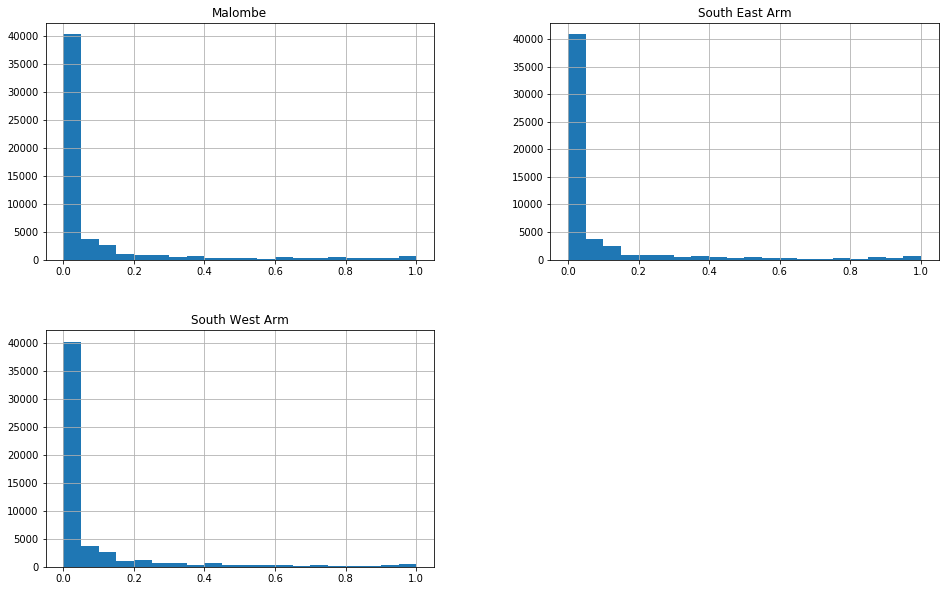

In [112]:
fig = plt.figure(figsize=(16,10))
ax = plt.gca()
axes = population_af.hist(bins=20, ax=ax)

Do the allele frequency spectra look different in the different populations?

### Calculate nucleotide diversity $\pi$ and divergence $d_{xy}$

In [113]:
# pi = 2p(1-p)
# dxy = pq

In [114]:
# apply a function in rolling windows of 100 SNPs
window_size = 100
rolling_window_df = population_af.loc['Contig237', 'Malombe'].rolling(window_size, 
                                                                      center=True, axis=0)
pi_rolling = rolling_window_df.apply(lambda s:(2*s*(1-s)).mean())

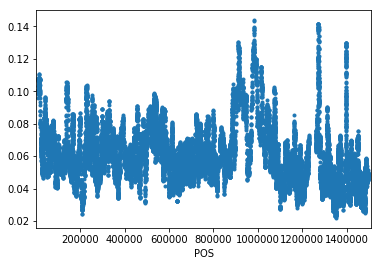

In [115]:
pi_rolling.plot(style='.')

In [116]:
def get_dxy(af):
    """
    Get dxy between Malombe and
    South East Arm
    """
    dxy = af['Malombe']*(1-af['South East Arm']) + (1-af['Malombe'])*af['South East Arm']
    return dxy.mean()

# apply function in non-overlapping 100 bp windows
window_size = 100
dxy = population_af.loc['Contig237'].groupby(lambda ix: ix // window_size).apply(get_dxy)

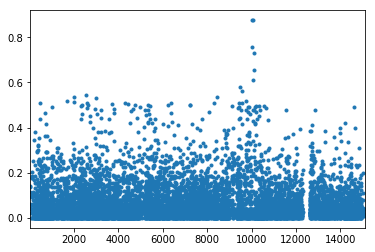

In [117]:
dxy.plot(style='.')

Vary the parameters of the above functions. Try to plot pi for the different chromosomes and the different populations.

#### A more general function to calculate dxy across muliple populations

In [118]:
def get_divergence(af):
    """
    Takes a allele frequency df
    returns nucleotide diversity (diagonal)
    and dxy (off-diagonal).
    
    Attention! The estimator for pi
    is biased because it does not take
    resampling of the same allele into account.
    For small populations pi will be downward biased.
    """
    
    # This looks complicated. If basically
    # uses tensor muliplication to efficiently
    # calculate all pairwise comparisons.
    divergence = np.einsum('ij,ik->jk',af, 1-af) \
            + np.einsum('ij,ik->jk',1-af, af)
    # the above results in a numpy array
    # put it into a data frame
    divergence = pd.DataFrame(divergence, 
                              index=af.columns,
                             columns=af.columns)
    return divergence

In [119]:
get_divergence(population_af)

,Malombe,South East Arm,South West Arm
Malombe,4585.342882,5005.335069,4908.479167
South East Arm,5005.335069,4463.021701,4866.949167
South West Arm,4908.479167,4866.949167,4687.815200


In [120]:
individual_af = hap_df_vir.groupby(axis=1, level=0).mean()

In [121]:
individual_dxy = get_divergence(individual_af)

In [122]:
#Be aware of the biased single-individual pi estimated on the diagonal.
individual_dxy

,VirMAL1,VirMAL10,VirMAL11,VirMAL12,VirMAL13,VirMAL14,VirMAL15,VirMAL16,VirMAL17,VirMAL18,...,VirSWA25,VirSWA26,VirSWA27,VirSWA3,VirSWA4,VirSWA5,VirSWA6,VirSWA7,VirSWA8,VirSWA9
VirMAL1,2207.0,4566.5,4506.0,4765.0,4441.0,4508.5,4269.5,4434.0,4533.0,4570.0,...,4726.5,4855.0,4796.0,4844.5,4375.0,4943.0,5100.5,4822.5,4680.5,4884.0
VirMAL10,4566.5,2616.0,4578.0,4878.0,4647.0,4757.0,4374.0,4888.0,4783.5,4649.0,...,4908.0,4933.5,4824.0,5016.0,4662.5,5262.5,5260.5,5110.0,5012.5,5118.0
VirMAL11,4506.0,4578.0,2581.5,4784.0,4685.5,4701.0,4408.5,4653.0,4869.5,4693.5,...,4883.0,4863.5,4808.0,4914.0,4568.0,4970.0,5027.0,4995.5,4912.0,5025.0
VirMAL12,4765.0,4878.0,4784.0,2431.5,4879.5,4658.5,4517.5,4715.5,5001.5,4725.5,...,4960.0,5032.0,4845.5,4828.5,4702.0,4710.5,4798.5,5006.0,4707.0,4644.5
VirMAL13,4441.0,4647.0,4685.5,4879.5,2079.5,4530.5,4367.5,4735.5,4522.0,4726.0,...,4819.5,4740.5,4687.0,4799.0,4483.5,4883.5,5107.5,4484.0,4619.5,4599.5
VirMAL14,4508.5,4757.0,4701.0,4658.5,4530.5,2474.5,4429.5,4928.5,4840.5,4512.0,...,4924.0,4885.5,4725.0,5029.5,4641.5,4678.0,5027.0,4798.0,4637.5,4638.0
VirMAL15,4269.5,4374.0,4408.5,4517.5,4367.5,4429.5,2227.0,4534.5,4641.0,4352.0,...,4671.5,4694.5,4711.0,4671.0,4388.5,4760.5,4934.0,4842.0,4657.0,4621.0
VirMAL16,4434.0,4888.0,4653.0,4715.5,4735.5,4928.5,4534.5,2340.5,4915.5,4906.0,...,4875.5,5005.0,4933.0,4775.0,4585.0,5100.0,4960.5,4990.0,4997.5,5076.5
VirMAL17,4533.0,4783.5,4869.5,5001.5,4522.0,4840.5,4641.0,4915.5,2359.5,4933.0,...,4895.0,5013.5,4923.0,4961.5,4523.5,5213.0,5201.5,4824.0,4863.0,4780.0
VirMAL18,4570.0,4649.0,4693.5,4725.5,4726.0,4512.0,4352.0,4906.0,4933.0,2378.5,...,5064.0,5103.5,4863.0,5076.0,4896.5,4827.5,5027.0,5029.0,4814.0,4768.5


The above could be used to construct a neighbour-joining tree.

## Ipython parallel

Ipython parallel is very handy to use multiple local or remote cores to do calculations. It is surprisingly easy to set up, even on a compute cluster. (However, the ipyparallel package is not installed for python 2.7 on this amazon cloud instance and I realised it too late to fix it.)

Here are more resource for the parallel setup: <br>
 - <https://ipython.org/ipython-doc/3/parallel/index.html>
 -  <https://ipython.org/ipython-doc/3/parallel/parallel_process.html>

A minimal example (that would work for me):

In a terminal execute ```ipcluster start -n 4``` to start a ipython cluster with 4 engines

In [123]:
from ipyparallel import Client

ImportError: No module named ipyparallel

In [ ]:
rc = Client(profile="default")
lv = rc.load_balanced_view()

In [ ]:
map_obj = lv.map_async(lambda x: x*x, range(20))

The above is the parallel equivalent of ```map(lambda x: x*x, range(20))``` but using the 4 engines started above.

In [ ]:
# retrieve the result
result = map_obj.result()

This is very useful to quickly analyse multiple chromosomes or chunks of chromosomes in parallel.